## Рынок заведений общественного питания Москвы

### Знакомство с данными

Посмотрим на данные внимательно.

In [3]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Убедимся, что тип данных в каждой колонке — правильный и посмотрим есть ли пропущенные значения.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Проверим данные на наличие дубликатов.

In [5]:
data.duplicated().sum()

0

In [6]:
print('В данных {} различных заведений и {} признаков.'.format(*data.shape))

В данных 15366 различных заведений и 6 признаков.


Идентификатор заведения id и количество посадочных number - целочисленного типа; название заведения object_name, является ли заведение сетевым chain, тип заведения object_type и адрес address - строкового типа object.

### Вывод

В данных 15366 различных заведений общественного питания и 6 признаков. Все типы данных корректные, в данных нет пропущенных значений и дубликатов. Можно приступать к предобработке данных.

<a id="preprocessing"></a>
### Предобработка данных

In [8]:
import re

In [9]:
for name in data['object_name']:
    if re.search(r'^М\w+-М\w', name):
        print(re.search(r'^М\w+-М\w', name).group())

Му-Му
Му-Му
МУ-МУ
МУ-МУ
Му-Му
Маки-Ма
Му-Му
МУ-МУ
Му-Му
Му-Му
Му-Му
МУ-МУ
Му-Му
Маки-Ма
МУ-МУ
Му-Му
Му-Му
Му-Му
МАКИ-МА
МУ-МУ
Му-Му
Мускат-Мо
Му-Му
Маки-Ма
МАКИ-МА
МУ-МУ
Му-Му
Му-Му
МУ-МУ


'МУ-МУ' и 'Му-Му', 'МАКИ-МА' и 'Маки-Ма' - это одни и те же кафе. Приведем название к нижнему регистру.

In [10]:
data['object_name'] = [name.lower() for name in data['object_name']]

In [11]:
data.duplicated().sum() # проверка на дубликаты

0

### Вывод

Так как в данных были одинаковые названия кафе написаны в разных регистрах, привели названия кафе к нижнему регстиру. Можно приступать к анализу данных.

<a id="analysis"></a>
### 4. Анализ данных

Зададим цветовую палитру и стиль для графиков.

In [12]:
sns.set_palette('Set1')
sns.set_style('whitegrid')

*1. Исследуем соотношение видов объектов общественного питания по количеству. Построим график.*

Построим круговую диаграмму.

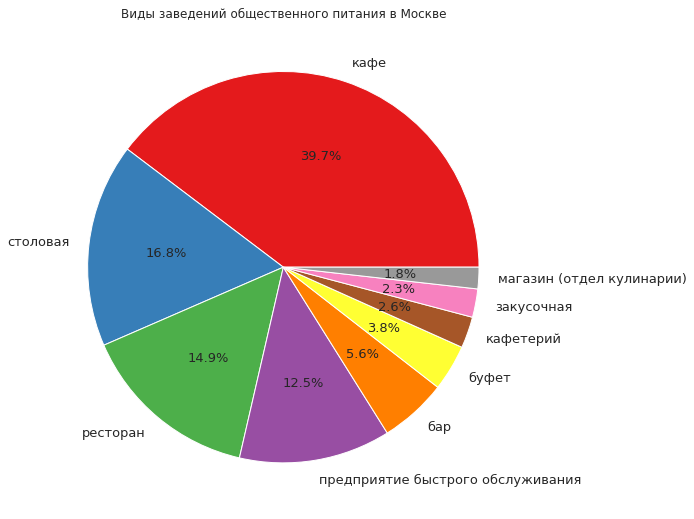

In [13]:
type_freq = data['object_type'].value_counts().to_frame()
type_freq.columns = ['Количество заведений']
type_freq.plot(kind='pie', subplots=True, figsize=(9,9), legend='', autopct='%1.1f%%', textprops={'fontsize': 13})
plt.axis('off')
plt.title('Виды заведений общественного питания в Москве')
plt.show()

Построим countplot в seaborn. Он лучше тем, что показывает не только процентное соотношение.

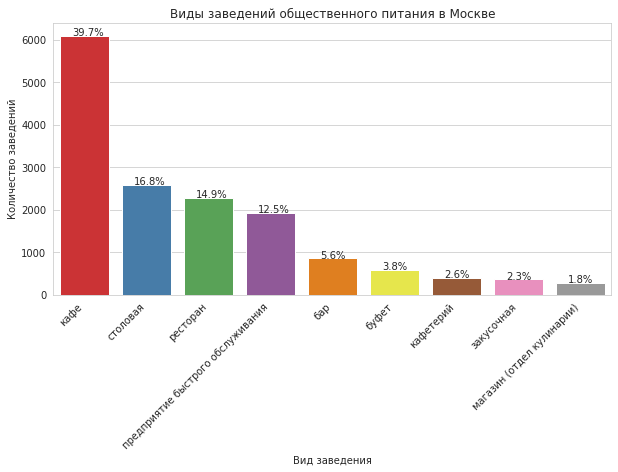

In [14]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='object_type', data=data, order=type_freq.index.tolist())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Вид заведения')
plt.ylabel('Количество заведений')
plt.title('Виды заведений общественного питания в Москве')

for p in chart.patches:
    chart.annotate('{:.1f}%'.format(p.get_height()/len(data)*100),(p.get_x()+0.2, p.get_height()+2))
plt.show()

- В Москве работает больше всего кафе. Они составляют около 40% всех заведений общественного питания. 


- Далее по численности идут столовые, рестораны и предприятия быстрого обсуживания, их 17%, 15% и 13% соответсвтенно.


- Баров, буфетов, кафетериев, закусочных и отделов кулинариии в магазине в Москве открыто от 6 до 2 %.

*2) Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.*

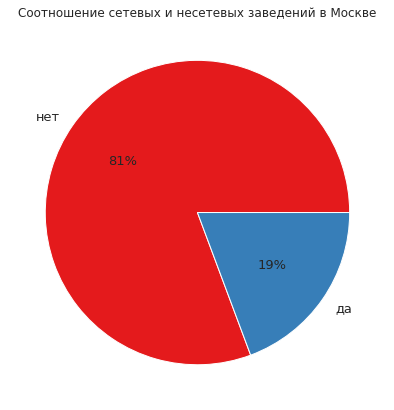

In [15]:
data['chain'].value_counts().plot(kind='pie', subplots=True, figsize=(7,7), legend='', autopct='%1.0f%%', textprops={'fontsize': 13})
plt.axis('off')
plt.title('Cоотношение сетевых и несетевых заведений в Москве')
plt.show()

- 80% всех заведений общественного питания в Москве - несетевые. 20% - сетевые.

## <span style="color:green">Отличная работа<span>
В данном случае круговая уместа и читаема.

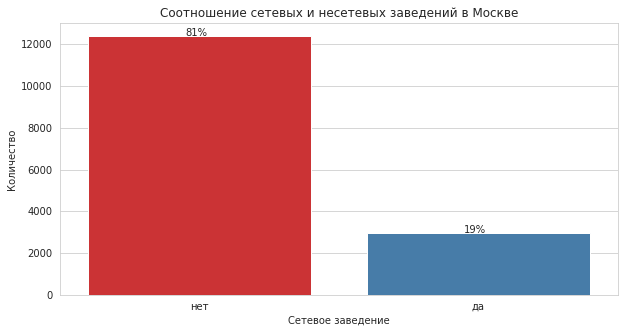

In [16]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='chain', data=data)
plt.xlabel('Сетевое заведение')
plt.ylabel('Количество')
plt.title('Cоотношение сетевых и несетевых заведений в Москве')

for p in chart.patches:
    chart.annotate('{:.0f}%'.format(p.get_height()/len(data)*100),(p.get_x()+0.35, p.get_height()+2))
plt.show()

*3) Исследуем для какого вида объекта общественного питания характерно сетевое распространение?*

In [18]:
#chain_objects = data.query('chain=="да"')['object_type'].value_counts().to_frame()

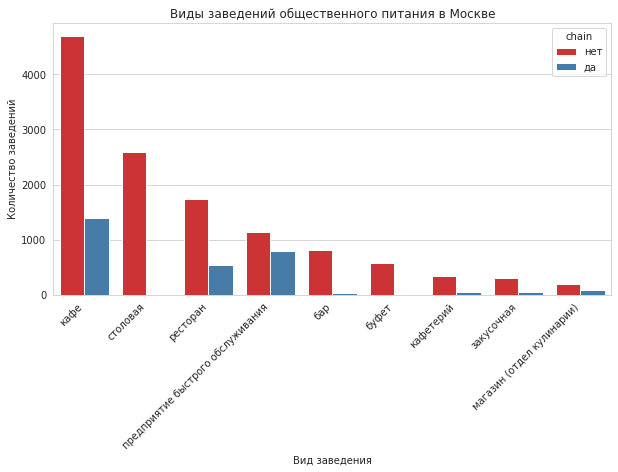

In [41]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='object_type', hue='chain', data=data, order=type_freq.index.tolist())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Вид заведения')
plt.ylabel('Количество заведений')
plt.title('Виды заведений общественного питания в Москве')
plt.show()

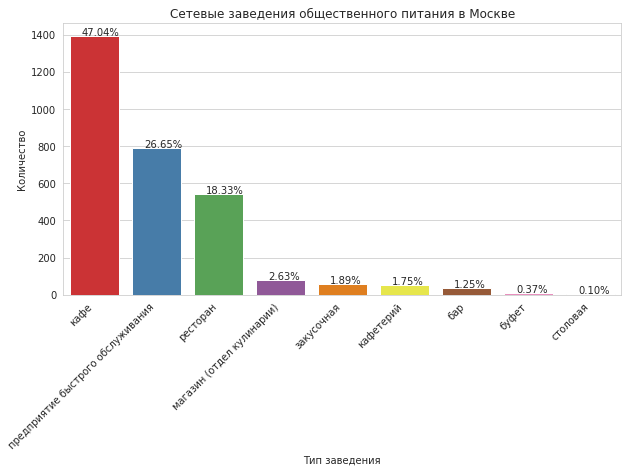

In [19]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='object_type', data=data.query('chain=="да"'), order=chain_objects.index.tolist())
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Тип заведения')
plt.ylabel('Количество')
plt.title('Сетевые заведения общественного питания в Москве')

for p in chart.patches:
    chart.annotate('{:.2f}%'.format(p.get_height()/len(data.query('chain=="да"'))*100),(p.get_x()+0.2, p.get_height()+2))
plt.show()

- Среди всех сетевых заведений общественного питания в Москве больше всего, окло 50%, кафе.

- Для предприятий быстрого обслуживания и ресторанов также характерно сетевое распространение.

- Для остальных видов заведений сетевое распространение редко. Наименее харакетрно сетевое распространение для буфета и столовой.

Можно объединить категории, которых меньше 3% среди всех сетевых заведений общественного питания, в одну категорию "другое".

In [20]:
chain_objects = chain_objects.reset_index()
chain_objects.columns = ['type', 'quantity']
chain_objects['type'] = np.where(chain_objects['quantity']>100, chain_objects['type'] ,'другое')

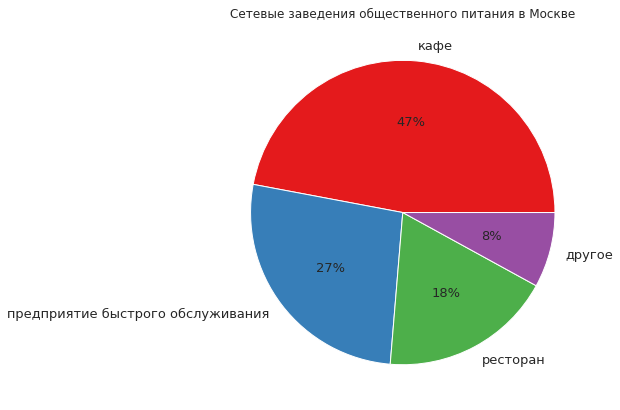

In [21]:
chain_objects.groupby('type')['quantity'].sum().to_frame().sort_values(by='quantity', ascending=False).plot(kind='pie', subplots=True, figsize=(7,7), legend='', autopct='%1.0f%%', textprops={'fontsize': 13})
plt.axis('off')
plt.title('Сетевые заведения общественного питания в Москве')
plt.show()

*4) Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?*

In [22]:
chain_objects = data.query('chain=="да"')
chain_objects = chain_objects.groupby('object_name').agg({'number':['count', 'mean']})
chain_objects.columns = ['quantity', 'sits_number']

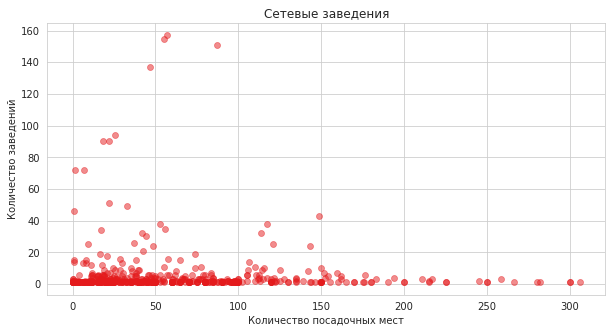

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='quantity', x='sits_number', data=chain_objects, edgecolor=None, alpha=0.5)
plt.ylabel('Количество заведений')
plt.xlabel('Количество посадочных мест')
plt.title("Сетевые заведения")
plt.show()

- Большинство сетей имеет до 20 заведений и в них до 150 мест.

*5) Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Посмотрим, какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.*

In [24]:
types = data.groupby('object_type', as_index=False)['number'].mean().sort_values(by='number', ascending=False)
types['number'] = types['number'].astype(int)

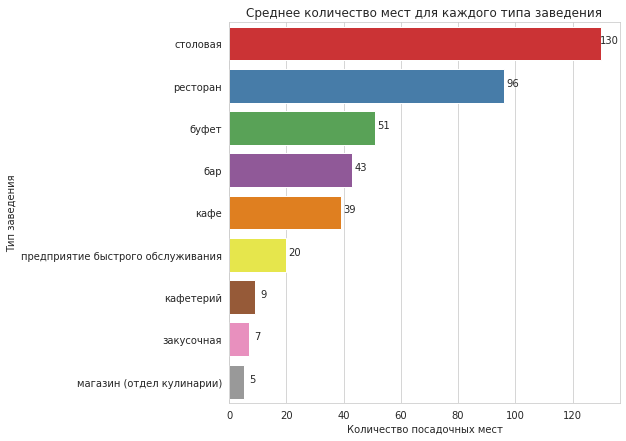

In [25]:
plt.figure(figsize=(7,7))
chart = sns.barplot(y='object_type', x='number', data=types)
plt.ylabel('Тип заведения')
plt.xlabel('Количество посадочных мест')
plt.title('Среднее количество мест для каждого типа заведения')

for p in chart.patches:
    width = p.get_width()
    chart.text(width + 3,
            p.get_y()+p.get_height()/2.,
            '{:1.0f}'.format(width),
            ha="center")
plt.show()

- Самое большое количество посадочных мест в столовых и ресторанах, в них в среденем от 100 до 130 мест.

- Далее идут буфет, бар, кафе и предприятия быстрого обслуживания, в них в среденм от 20 до 50 мест.

- Меньше всего мест в кафетериях, закусочных и отделах кулинарии в магазинах, в них в среденем от 5 до 10 мест.

*6) Выделим в отдельный столбец информацию об улице из столбца address*

Для того, чтобы выделить улицу будем предполагать, что в большинстве случаев улица идет после города. 

Будем разбивать строку адреса по запятой и брать второй элемент из массива, в большинстве случаев массив будет иметь вид ['город', 'улица', 'дом'].

In [26]:
def get_street(address):
    return address.split(",")[1].strip()

data['street'] = data['address'].apply(get_street)

In [27]:
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


*7) Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?*

Получилось найти и скачать адресный реестр объектов недвижимости города Москвы (https://data.mos.ru/datasets/60562), в котором есть нужная информация.

Сслыка на данные: https://drive.google.com/file/d/1RJlIEXh5KXPrUlZyGAldo4fml1vtFe-J/view?usp=sharing

In [28]:
full_moscow_data = pd.read_excel('data-29580-2020-07-28.xlsx')

In [47]:
#from io import BytesIO
#import requests
#spreadsheet_id = '148SuaEP6gpJ_NNKsc6-MwKMQeLp5WcfY'
#file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
#r = requests.get(file_name)
#df = pd.read_csv(BytesIO(r.content))
#df.head()

In [30]:
moscow_data = full_moscow_data[['ADDRESS', 'P5']]
moscow_data.columns = ['address', 'district']
moscow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282000 entries, 0 to 281999
Data columns (total 2 columns):
address     282000 non-null object
district    140795 non-null object
dtypes: object(2)
memory usage: 4.3+ MB


Видим, что во внешних данных есть информация о 282000 адресах, но есть пропуски в районах. 

Присоедним к таблице data доступные данные о мунициапльных районах в moscow_data с помощью merge по ключу address.

In [31]:
full_data = data.merge(moscow_data, on='address', how='left')

In [32]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15380 entries, 0 to 15379
Data columns (total 8 columns):
id             15380 non-null int64
object_name    15380 non-null object
chain          15380 non-null object
object_type    15380 non-null object
address        15380 non-null object
number         15380 non-null int64
street         15380 non-null object
district       13882 non-null object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


Видим, что не для всех адресов получилось восстановить район. Но таких адресов менее 1%, не будем трогать пропуски.

In [33]:
len(full_data[full_data['district'].isna()])/len(data)

0.09748796043212286

In [34]:
full_data.head()

,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,муниципальный округ Ярославский
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,NaN
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,муниципальный округ Таганский
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,муниципальный округ Лианозово
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,муниципальный округ Лианозово


Найдем сколько заведений работает на каждой улице в каждом районе.

In [35]:
n_by_street_district = full_data.groupby(['street', 'district'])\
                           .agg({'number': 'count'})\
                           .sort_values(by='number', ascending=False).reset_index()
n_by_street_district[n_by_street_district['street'] == 'город Зеленоград']

,street,district,number
24,город Зеленоград,муниципальный округ Крюково,55
26,город Зеленоград,муниципальный округ Матушкино,52
64,город Зеленоград,муниципальное образование Савелки,37
82,город Зеленоград,муниципальный округ Силино,31
127,город Зеленоград,муниципальный округ Старое Крюково,23


In [36]:
n_by_street_district[n_by_street_district['district'] == 'муниципальный округ Марьина Роща']

,street,district,number
4,улица Сущёвский Вал,муниципальный округ Марьина Роща,82
52,Шереметьевская улица,муниципальный округ Марьина Роща,39
273,улица Образцова,муниципальный округ Марьина Роща,13
460,Новосущёвская улица,муниципальный округ Марьина Роща,8
592,Полковая улица,муниципальный округ Марьина Роща,6
833,улица Двинцев,муниципальный округ Марьина Роща,4
861,Октябрьский переулок,муниципальный округ Марьина Роща,4
1024,Лазаревский переулок,муниципальный округ Марьина Роща,3
1142,площадь Борьбы,муниципальный округ Марьина Роща,2
1211,3-й проезд Марьиной Рощи,муниципальный округ Марьина Роща,2


Построим график топ-10 улиц по количеству объектов общественного питания. При этом не будем учитывать город Зеленоград. Предположим, что планируем открыть первое заведение не так удаленно от центра Москвы.

In [37]:
top10_streets = n_by_street_district.query('street !="город Зеленоград"')\
                                    .groupby('street')['number'].sum()\
                                    .sort_values(ascending=False)[:10].to_frame().reset_index()

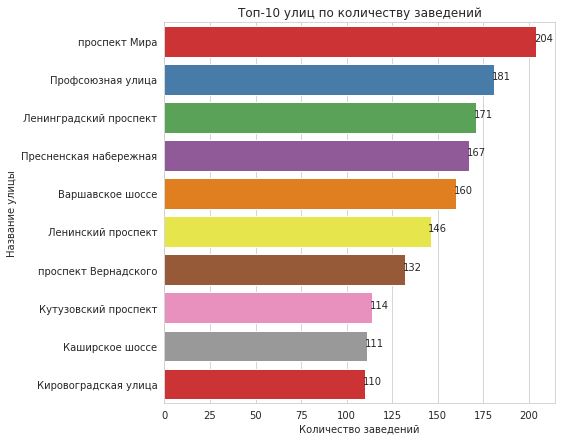

In [38]:
plt.figure(figsize=(7,7))
chart = sns.barplot(y='street', x='number', data=top10_streets, palette='Set1')
plt.xlabel('Количество заведений')
plt.ylabel('Название улицы')
plt.title('Топ-10 улиц по количеству заведений')

for p in chart.patches:
    width = p.get_width()
    chart.text(width + 4,
            p.get_y()+p.get_height()/2.,
            '{:1.0f}'.format(width),
            ha="center")
plt.show()

- Больше всего заведений находится на важнейших транспортных магистралях Москвы - проспект Мира, Профсоюзная улица, Лениградский проспект, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе - в центре на Пресненской набережной и на улице Кировоградской.

Посмотрим, в каких районах Москвы находятся эти улицы.

top10_streets_names - названия топ-10 улиц с наибольшим количеством заведений.

In [39]:
top10_streets_names = top10_streets["street"].tolist()

Выберем из таблицы n_by_street_district информацию о том, сколько улиц находится в кадом районе для топ-10 улиц с наибольшим коичеством заведений.

In [40]:
top10_streets_districts = n_by_street_district.query('street in @top10_streets_names')\
                                              .sort_values(by=['street','number'], ascending=False)

Для каждой улицы выберем все районы, где открыты заведения общественного питания.

In [41]:
top10_streets_districts = top10_streets_districts.groupby('street')['district'].apply(", ".join).reset_index()

Выведем результаты топ-10 улиц по количеству заведений с районами. 

In [42]:
top10_streets_districts = top10_streets_districts.merge(top10_streets, on='street')
top10_streets_districts = top10_streets_districts.sort_values(by='number', ascending=False)[['street', 'district']]\
                                                 .set_index('street')
top10_streets_districts

,district
street,
проспект Мира,"муниципальный округ Мещанский, муниципальный округ Свиблово, муниципальный округ Алексеевский, муниципальный округ Останкинский, муниципальный округ Ростокино, муниципальный округ Ярославский"
Профсоюзная улица,"муниципальный округ Теплый Стан, муниципальный округ Черемушки, муниципальный округ Коньково, муниципальный округ Обручевский, муниципальный округ Академический, муниципальный округ Ясенево"
Ленинградский проспект,"муниципальный округ Аэропорт, муниципальный округ Беговой, муниципальный округ Хорошевский, муниципальный округ Сокол"
Пресненская набережная,муниципальный округ Пресненский
Варшавское шоссе,"муниципальный округ Нагорный, муниципальный округ Чертаново Южное, муниципальный округ Донской, муниципальный округ Чертаново Северное, муниципальный округ Чертаново Центральное, муниципальный округ Нагатино-Садовники, муниципальный округ Южное Бутово"
Ленинский проспект,"муниципальный округ Гагаринский, муниципальный округ Обручевский, муниципальный округ Якиманка, муниципальный округ Тропарево-Никулино, муниципальный округ Донской, муниципальный округ Ломоносовский, муниципальный округ Теплый Стан, муниципальный округ Проспект Вернадского"
проспект Вернадского,"муниципальный округ Тропарево-Никулино, муниципальный округ Раменки, муниципальный округ Проспект Вернадского, муниципальный округ Ломоносовский, муниципальный округ Гагаринский"
Кутузовский проспект,"муниципальный округ Дорогомилово, муниципальный округ Фили-Давыдково"
Каширское шоссе,"муниципальный округ Нагатино-Садовники, муниципальный округ Москворечье-Сабурово, муниципальный округ Орехово-Борисово Северное, муниципальный округ Орехово-Борисово Южное"


- Больше всего заведений общественного питания, более 200, находится на Проспекте мира, в районах Мещанский, Алексеевский, Останкинский, Свиблово, Ростокино, Ярославский.


- Профсоюзня улица (более 180 заведений) - улица в Юго-Западном административном округе города Москвы на территории районов Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево.


- Ленинградский проспект (170 заведений) находится в Северном административном округе города Москвы на территории районов Беговой, Аэропорт, Сокол, Хорошёвский.


- Пресненская набережная (167 заведений) находится в Центральном административном округе годрода в районе Пресненский.


- Вашравской шоссе (160 заведение) проходит через районы: Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное Южного автономного окргуа и Северное Бутово, Южное Бутово Юго-Западного автономного округа города Москвы.


- Ленинский проспект (146 заведений) находится в ЦАО, ЮАО, ЮЗАО, ЗАО на территории районов Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино.


- проспект Вернадского (132 завдения) находится в Юго-Западном и Западном административных округах города Москвы на территории районов Гагаринский, Ломоносовский, Раменки, Проспект Вернадского, Тропарёво-Никулино.


- Кутузовский проспект (114 заведений) в Западном административном округе Москвы, расположен на территории районов Дорогомилово и Фили-Давыдково.


- Каширское шоссе (111 заведений) лежит на терртории районой Нагатино-Садовники, Москворечье-Сабурово, Орехово-Борисово Северное, Орехово-Борисово Южное.

- Кировоградская улица (110 заведений) в районах Чертаново Центральное, Чертаново Северное, Чертаново Южное.


*Таким образом большинство заведений общестенного питания расположено вдоль важнейших транспортных магистралей столицы: проспекты Мира, Вернадского, Профсоюзная улица, Ленинградский, Ленинский, Кутузовский проспекты, Варшавской шоссе, Каширское шоссе, в центре Москвы в Пресненском районе или на улице Кировоградская.*

*8) Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?*

In [43]:
one_by_street_district = n_by_street_district.groupby('street').filter(lambda x: x['number'].sum()== 1)
len(one_by_street_district)

533

In [62]:
one_by_street_district

,street,district,number
1422,3-я Песчаная улица,муниципальный округ Хорошевский,1
1423,80-й километр Московской Кольцевой Автодороги,муниципальный округ Дмитровский,1
1424,Прокатная улица,муниципальный округ Ивановское,1
1425,Нижний Журавлёв переулок,муниципальный округ Соколиная Гора,1
1426,улица Маршала Новикова,муниципальный округ Щукино,1
1427,Мишина улица,муниципальный округ Савеловский,1
1428,улица Маршала Мерецкова,муниципальный округ Щукино,1
1429,Нижний Кисельный переулок,муниципальный округ Мещанский,1
1431,3-я Подрезковская улица,муниципальный округ Молжаниновский,1
1432,8-я улица Соколиной Горы,муниципальный округ Соколиная Гора,1


В Москве 533 улицы с одним объектом общественного питания. Можно рассмототреть их подбробнее.

Посмотрим на район и сколько в нем улиц, на которых расположено по одному заведению общественного питания.

In [44]:
one_place_districts = n_by_street_district.groupby('street').filter(lambda x: x['number'].sum()== 1)\
                                      .groupby('district')['number'].sum()\
                                      .sort_values(ascending=False).to_frame()
one_place_districts

,number
district,
муниципальный округ Таганский,27
муниципальный округ Хамовники,26
муниципальный округ Басманный,22
муниципальный округ Тверской,20
муниципальный округ Пресненский,19
муниципальный округ Марьина Роща,17
муниципальный округ Сокольники,15
муниципальный округ Замоскворечье,12
муниципальный округ Соколиная Гора,12


Больше всего улиц с одним объектом общественного питания находятся в районах: Таганский, Хамовники, Басманный, Тверской и Пресненский.

*9) Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?*

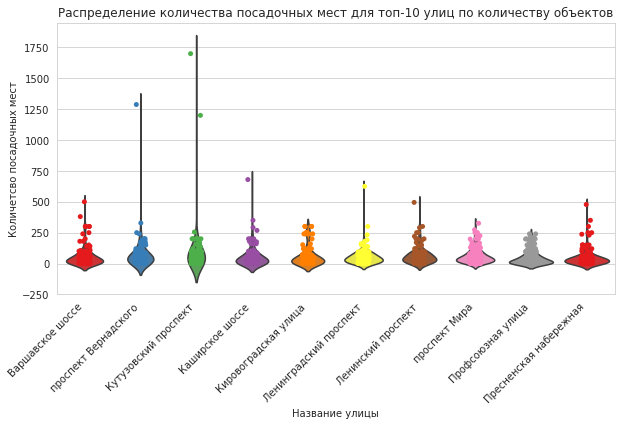

In [52]:
plt.figure(figsize=(10,5))
plt.title("Распределение количества посадочных мест для топ-10 улиц по количеству объектов")
chart = sns.violinplot(x="street", y="number", data=data.query('street in @top10_streets_names'), palette='Set1')
chart = sns.stripplot(x="street", y="number", data=data.query('street in @top10_streets_names'), palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Название улицы')
plt.ylabel("Количетсво посадочных мест")
plt.show()

- Для топ-10 улиц по колучеству объектов почти все заведения имеют до 250 мест.

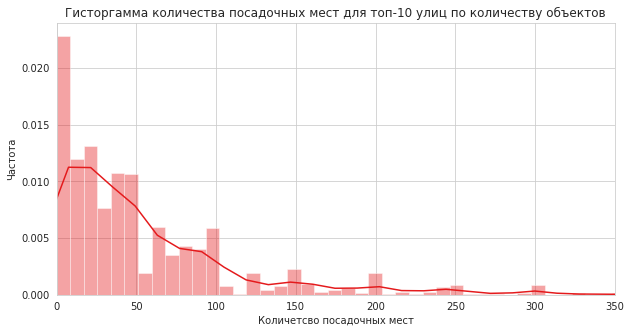

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(data.query('street in @top10_streets_names')['number'], bins=200)
plt.xlim(0, 350)
plt.xlabel('Количетсво посадочных мест')
plt.ylabel("Частота")
plt.title("Гисторгамма количества посадочных мест для топ-10 улиц по количеству объектов")
plt.show()

Большинство заведенй с большим количеством объектов имеют до 100 посадочных мест.

Видим пики на 50, 100, 150, 200, 250, 300 - хозяева заведений общественных питаний склонны выбирать число мест в заведении, кратное 50.


### Вывод

Анализ данных позволил увидеть, что

1) в Москве работает больше всего кафе - они составляют около 40% всех заведений общественного питания; далее по численности идут столовые, рестораны и предприятия быстрого обсуживания, их 17%, 15% и 13% соответсвтенно; баров, буфетов, кафетериев, закусочных и отделов кулинариии в магазине в Москве открыто от 6 до 2 %.

2) 4/5 всех заведений общественного питания в Москве - несетевые и 1/5 - сетевые.

3) среди всех сетевых заведений общественного питания в Москве больше всего, около 50%, кафе; для предприятий быстрого обслуживания и ресторанов также характерно сетевое распространение; для остальных видов заведений сетевое распространение редко. Наименее харакетрно сетевое распространение для буфета и столовой.

4) большинство сетей имеет до 20 заведений и в них до 150 мест.

5) самое большое количество посадочных мест в столовых и ресторанах, в них в среденем от 100 до 130 мест; далее идут буфет, бар, кафе и предприятия быстрого обслуживания, в них в среденм от 20 до 50 мест; меньше всего мест в кафетериях, закусочных и отделах кулинарии в магазинах, в них в среденем от 5 до 10 мест.

6) больше всего заведений находится на важнейших транспортных магистралях Москвы - проспект Мира, Профсоюзная улица, Лениградский проспект, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе - в центре на Пресненской набережной и на улице Кировоградской.

7) в Москве 533 улицы с одним объектом общественного питания; больше всего улиц с одним объектом общественного питания находятся в районах: Таганский, Хамовники, Бассманный, Тверской и Пресненский.

8) Большинство заведений с большим количеством объектов имеют до 100 посадочных мест.

<a id="summary"></a>
### 5. Общий вывод

Данные были загружены, изучены и предобработаны: все названия кафе были приведены к нижнему регистру.

Было исследовано соотношение видов объектов общественного питания по количеству - в Москве работает больше всего кафе (около 40%); далее по численности идут столовые, рестораны и предприятия быстрого обсуживания (17%, 15% и 13% соответсвтенно); меньше всего баров, буфетов, кафетериев, закусочных и отделов кулинариии в магазине ( 2-6%); 


Установили, что 80% объектов - несетевые и 20% - сетевые.


Среди всех сетевых заведений общественного питания в Москве больше всего кафе (около 50%), ресторанов и предприятий быстрого обсуживания; наименее харакетрно сетевое распространение для буфета и столовой. Большинство сетей имеет до 20 заведений и в них до 150 мест.


Увидели, что самое большое количество посадочных мест в столовых и ресторанах (от 100 до 130 мест); меньше всего мест в кафетериях, закусочных и отделах кулинарии в магазинах, в них в среднем от 5 до 10 мест.


Поняли, что больше всего заведений находится на важнейших транспортных магистралях Москвы - проспект Мира, Профсоюзная улица, Лениградский проспект, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе - в центре на Пресненской набережной и на улице Кировоградской. Большинство заведений с большим количеством объектов имеют до 100 посадочных мест.


В Москве 533 улицы с одним объектом общественного питания; больше всего улиц с одним объектом общественного питания находятся в районах: Таганский, Хамовники, Бассманный, Тверской и Пресненский.


**Рекомендации о виде заведения, количестве посадочных мест, а также районе расположения:**

*Открыть кафе до 50 человек в центральном административном округе, например, Таганском районе. В районе много улиц с одним завдением, то есть есть возможность открыть новое кафе и точно много людей. Также особенность кафе - роботы - должна предполагать удобную доступность кафе. Аренда в Таганском районе скорее всего стоит меньше, чем в Тверском или Пресненском.*


**Комментирии о возможности развития сети:**

*Со временем можно открывать такие же небольшие кафе на 50 человек и на транспортных магистралях, например, на Ленинградском или Ленинском проспектах. В идеале, конечно, добраться и до Зеленограда, так как там тоже большой спрос на заведения общественного питания.*

Презентация: https://drive.google.com/file/d/1hznIYUyUiEz7IUN2rWcK7B5-vavWcoIr/view?usp=sharing